In [1]:
import torch
import matplotlib.pyplot as plt
import os

In [32]:
reduced_HASARLI_dir='/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/predictions/DS542_Final/reduced_results/HASARLI_reduced/'

reduced_HASARLI_files=[file for file in os.listdir(reduced_HASARLI_dir) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]


In [33]:
reduced_HASARSIZ_dir='/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/predictions/DS542_Final/reduced_results/HASARSIZ_reduced/'

reduced_HASARSIZ_files=[file for file in os.listdir(reduced_HASARSIZ_dir) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]


In [34]:
damaged_dir="/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/predictions/DS542_Final/Dataset/damaged/"

damaged_files=[file for file in os.listdir(damaged_dir) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]


In [35]:
no_damaged_dir="/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/predictions/DS542_Final/Dataset/no_damaged/"

no_damaged_files=[file for file in os.listdir(no_damaged_dir) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]


In [36]:
for damaged_file in damaged_files:
    
    if damaged_file not in reduced_HASARLI_files:
        os.remove(damaged_dir+damaged_file)

In [40]:
for no_damaged_file in no_damaged_files:
    
    if no_damaged_file not in reduced_HASARSIZ_files:
        os.remove(no_damaged_dir+no_damaged_file)

In [38]:
damaged_dir="/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/predictions/DS542_Final/Dataset/damaged/"

damaged_files=[file for file in os.listdir(damaged_dir) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]


In [41]:
no_damaged_dir="/Users/canerozer/Desktop/BU/FALL2024/DS542/Project/predictions/DS542_Final/Dataset/no_damaged/"

no_damaged_files=[file for file in os.listdir(no_damaged_dir) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]


In [2]:
from data_loader import full_dataset, train_dataset, valid_dataset

#summary statistics of the dataset
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(valid_dataset)}")
print(f"Class labels: {full_dataset.class_to_idx}")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <F81FE6D0-AC77-3053-BCFD-882E8FD2B3B5> /Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/torchvision/image.so
  Expected in:     <479B05C1-363C-3799-AAF4-CF79A0358897> /Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Number of training samples: 3570
Number of validation samples: 892
Class labels: {'damaged': 0, 'no_damaged': 1}
Using device: cpu
Number of training samples: 3570
Number of validation samples: 892
Class labels: {'damaged': 0, 'no_damaged': 1}
Using device: cpu


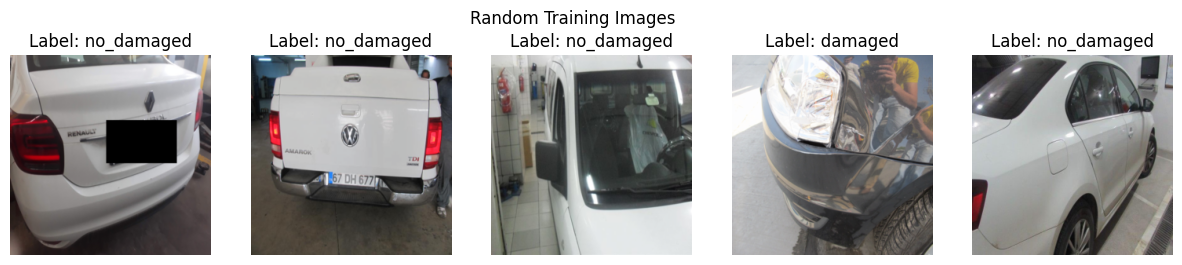

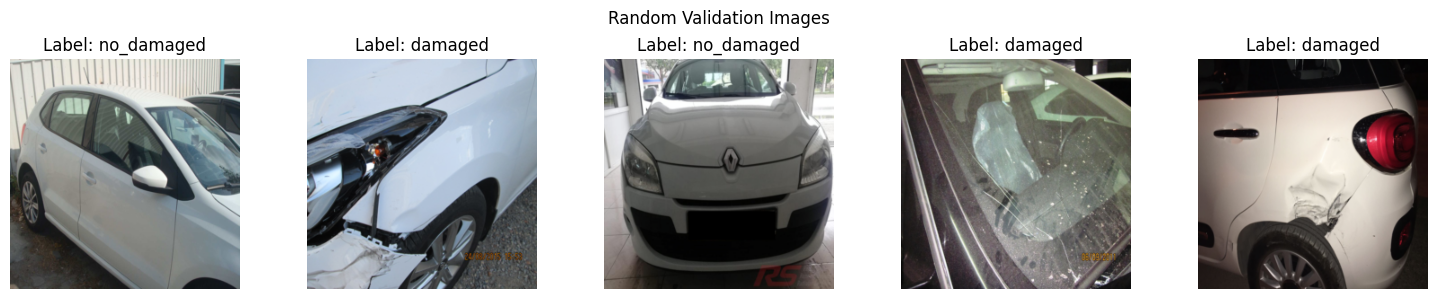

In [3]:
from data_loader import show_random_images

#show random training images
show_random_images(train_dataset, title="Random Training Images")

# Show random validation images
show_random_images(valid_dataset, title="Random Validation Images")

plt.tight_layout()
plt.show()

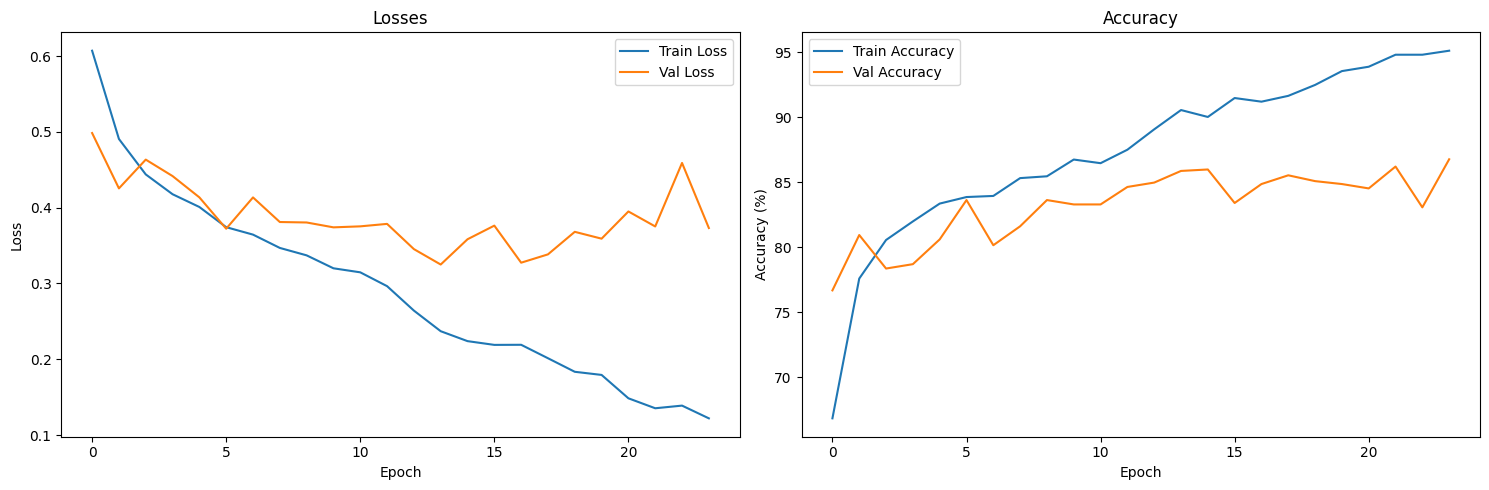

Epoch 24/50
Train Acc: 95.1% | Val Acc: 86.8%
Train Loss: 0.1220 | Val Loss: 0.3731

Early stopping at epoch 24
Best model was saved at epoch 14 with validation loss: 0.3249
Model saved to models/final_model.pth


In [4]:
from train_model import quick_train_model
from model import cnn_model

model = quick_train_model(cnn_model)

Model loaded from models/best_model.pth


/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: <F81FE6D0-AC77-3053-BCFD-882E8FD2B3B5> /Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/torchvision/image.so
  Expected in:     <479B05C1-363C-3799-AAF4-CF79A0358897> /Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/torch/lib/libc10.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/canerozer/opt/anaconda3/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/can

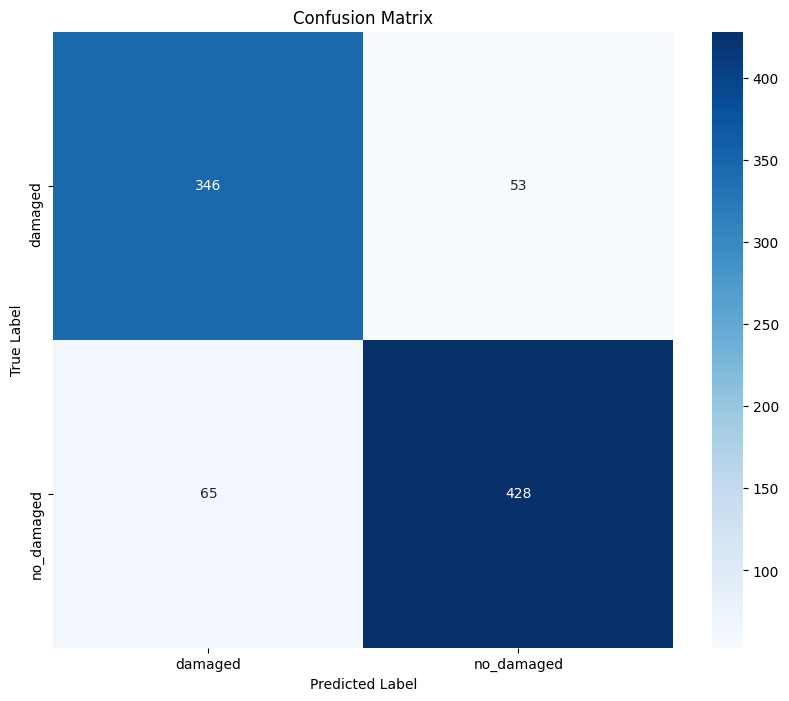


Overall Accuracy: 86.77%
damaged Accuracy: 86.72%
no_damaged Accuracy: 86.82%


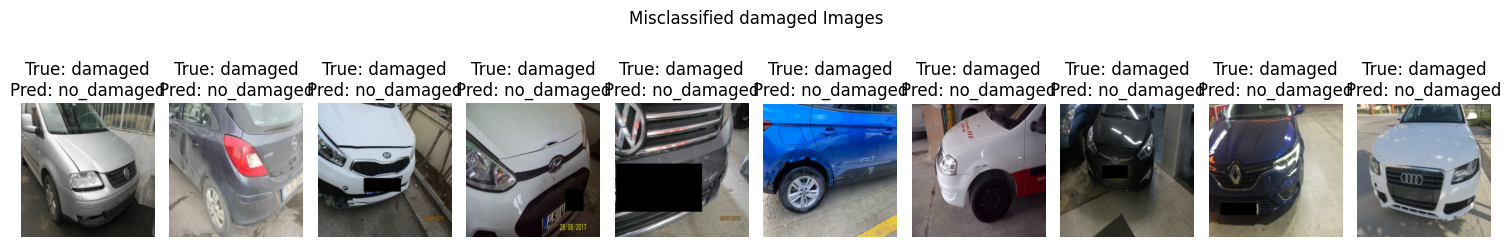

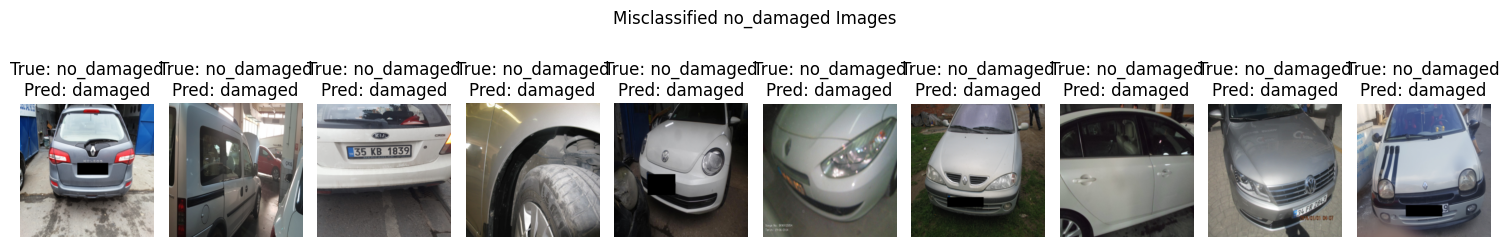

In [8]:
from evaluation import evaluate_model
from data_loader import valid_loader
from model import load_model

best_model = load_model('best_model.pth')

evaluate_model(model, valid_loader)